
# Self-Attention

### Imports

In [15]:
import math
import torch
import numpy as np
import seaborn as sns
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.nn.functional as F

### Sample tokens

In [6]:
x = torch.rand((1, 4, 8), dtype=torch.float)
print(x.shape)
print(x)

torch.Size([1, 4, 8])
tensor([[[0.4492, 0.7482, 0.9743, 0.4902, 0.6882, 0.8261, 0.7019, 0.8905],
         [0.7696, 0.6936, 0.1931, 0.6424, 0.8692, 0.5552, 0.1341, 0.5968],
         [0.9755, 0.1883, 0.1096, 0.6984, 0.9670, 0.2767, 0.5880, 0.7962],
         [0.6338, 0.5378, 0.5925, 0.4842, 0.1024, 0.8688, 0.8972, 0.7544]]])


### Attention class

In [21]:
class SelfAttention(nn.Module):
    def __init__(self, embed_dim):
        super().__init__()
        self.embed_dim = embed_dim

        self.Q = nn.Linear(self.embed_dim, self.embed_dim, bias=False)
        self.K = nn.Linear(self.embed_dim, self.embed_dim, bias=False)
        self.V = nn.Linear(self.embed_dim, self.embed_dim, bias=False)

    def forward(self, x):
        Query = self.Q(x)
        Key = self.K(x)
        Value = self.V(x)

        attention_scores = Query@Key.transpose(-2,-1)
        
        print(f"ATTENTION SCORES SIZE: {attention_scores.shape}")
        print(f"KEY SIZE: {Key.size(-1)}")
        
        scaled_attn_scores = attention_scores/math.sqrt(Key.size(-1))

        print(f"SCALED ATTN SHAPE: {scaled_attn_scores.shape}")
        
        normalized_attn_scores = F.softmax(scaled_attn_scores, dim=-1)
        
        print(f"NORMALIZED ATTN SCORES: {normalized_attn_scores.shape}")
        
        output = normalized_attn_scores @ Value
        
        return output

### Usage

In [22]:
attn = SelfAttention(8)
print(f"INPUT SHAPE: {x.shape}")
output = attn.forward(x)
print(output)
print(output.shape)

INPUT SHAPE: torch.Size([1, 4, 8])
ATTENTION SCORES SIZE: torch.Size([1, 4, 4])
KEY SIZE: 8
SCALED ATTN SHAPE: torch.Size([1, 4, 4])
NORMALIZED ATTN SCORES: torch.Size([1, 4, 4])
tensor([[[ 0.4011, -0.0682, -0.4155,  0.3873,  0.0694, -0.4069,  0.0800,
          -0.3721],
         [ 0.4010, -0.0681, -0.4156,  0.3873,  0.0696, -0.4066,  0.0796,
          -0.3714],
         [ 0.4014, -0.0687, -0.4149,  0.3882,  0.0693, -0.4073,  0.0805,
          -0.3725],
         [ 0.3999, -0.0670, -0.4165,  0.3859,  0.0703, -0.4055,  0.0780,
          -0.3694]]], grad_fn=<UnsafeViewBackward0>)
torch.Size([1, 4, 8])


In [32]:
token_embed = torch.rand((2,8), dtype=torch.float)

attn = SelfAttention(8)

output = attn.forward(token_embed)

ATTENTION SCORES SIZE: torch.Size([2, 2])
KEY SIZE: 8
SCALED ATTN SHAPE: torch.Size([2, 2])
NORMALIZED ATTN SCORES: torch.Size([2, 2])


[Text(0.5, 1.0, 'Attention Weights Heatmap'),
 Text(0.5, 158.72222222222223, 'Key Tokens'),
 Text(50.722222222222214, 0.5, 'Query Tokens')]

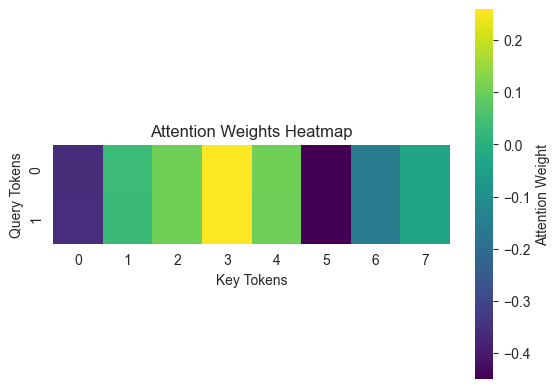

In [33]:
sns.set_style("whitegrid")
heatmap = sns.heatmap(
    data=output.detach().numpy(),
    cmap='viridis',
    annot=False,
    square=True,
    cbar_kws={"label": "Attention Weight"}
)
heatmap.set(title="Attention Weights Heatmap", xlabel='Key Tokens', ylabel='Query Tokens')